In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import umap

In [2]:
plane_index = 3

In [3]:
pt_neuron_array = np.load(f'data/p{plane_index}/p{plane_index}_all_neuron_array_preprocessed.npy')
pt_cal_act = np.load(f'data/p{plane_index}/p{plane_index}_all_neuron_stimwise_preprocessed.npy')
mask_path = f'data/p{plane_index}/Mask.tif'
mask = tifffile.imread(mask_path)
print(np.shape(pt_neuron_array))
print(np.shape(pt_cal_act))
print(np.shape(mask))

(993, 411, 411)
(993, 3, 336)
(411, 411)


In [8]:
slope_record = np.load(f'data/p{plane_index}/ttest_out/all_neurons_slope_record.npy')
trial_avg_p = np.load(f'data/p{plane_index}/ttest_out/all_neurons_trial_avg_p.npy')
correlate_p = np.load(f'data/p{plane_index}/ttest_out/all_neurons_correlate_p.npy')
fit_line_barcode = np.load(f'data/p{plane_index}/ttest_out/all_neurons_fit_line_barcode.npy')
fit_avg_barcode = np.load(f'data/p{plane_index}/ttest_out/all_neurons_fit_avg_barcode.npy')

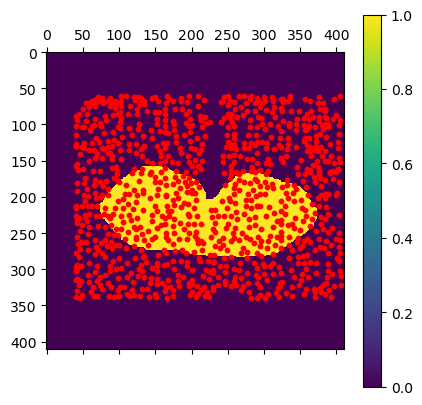

In [13]:
median_coord = np.zeros((np.shape(pt_neuron_array)[0], 2))
for neuron in range(np.shape(pt_neuron_array)[0]):#np.shape(pt_neuron_array)[0]
    mean_x = 0
    mean_y = 0
    coordinate_record = np.where(pt_neuron_array[neuron] > 0)
    #print(pt_neuron_array[neuron, coordinate_record[0][1], coordinate_record[1][1]])
    #print(coordinate_record[0][1], coordinate_record[1][1])
    #print(np.shape(coordinate_record))
    loc_record = pt_neuron_array[neuron, coordinate_record[0], coordinate_record[1]]
    assert(loc_record.all() == 1)
    mean_y = np.median(coordinate_record[0])
    mean_x = np.median(coordinate_record[1])
    median_coord[neuron] = np.array([mean_x, mean_y])
plt.matshow(mask)
plt.scatter(median_coord[:,0], median_coord[:, 1], color = 'red', s = 10)
plt.colorbar()
#plt.savefig(f'umap_plot/p{plane_index}/neuron_coordinate.png')
plt.show()


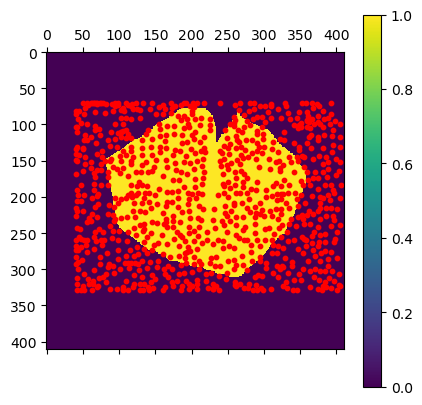

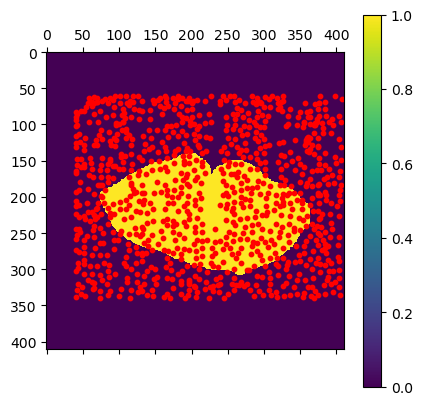

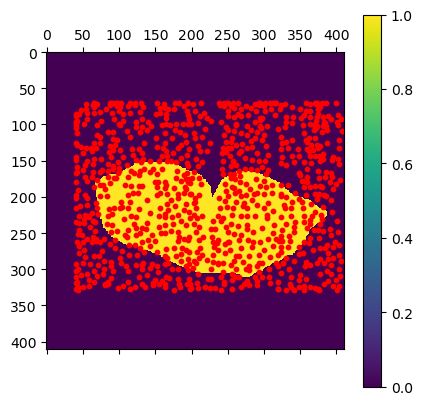

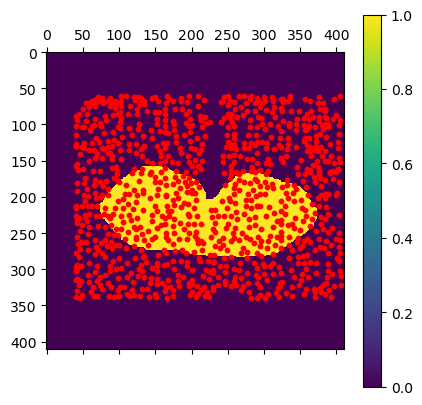

In [4]:
for plane_index in range(4):
    pt_neuron_array = np.load(f'data/p{plane_index}/p{plane_index}_all_neuron_array_preprocessed.npy')
    pt_cal_act = np.load(f'data/p{plane_index}/p{plane_index}_all_neuron_stimwise_preprocessed.npy')
    mask_path = f'data/p{plane_index}/Mask.tif'
    mask = tifffile.imread(mask_path)

    median_coord = np.zeros((np.shape(pt_neuron_array)[0], 2))
    for neuron in range(np.shape(pt_neuron_array)[0]):#np.shape(pt_neuron_array)[0]
        mean_x = 0
        mean_y = 0
        coordinate_record = np.where(pt_neuron_array[neuron] > 0)
        loc_record = pt_neuron_array[neuron, coordinate_record[0], coordinate_record[1]]
        assert(loc_record.all() == 1)
        mean_y = np.median(coordinate_record[0])
        mean_x = np.median(coordinate_record[1])
        median_coord[neuron] = np.array([mean_x, mean_y])
    plt.matshow(mask)
    plt.scatter(median_coord[:,0], median_coord[:, 1], color = 'red', s = 10)
    plt.colorbar()
    plt.show()


In [29]:
slope_mean = np.mean(slope_record, axis = 1)
slope_sum = np.sum(np.abs(slope_mean), axis = 1)
slope_normalize = slope_mean / slope_sum[:, np.newaxis]

In [30]:
reducer = umap.UMAP()
umap_normalize_res = reducer.fit_transform(slope_normalize)
print(np.shape(umap_normalize_res))
plt.scatter(umap_normalize_res[:, 0],umap_normalize_res[:, 1])
plt.title('Umap Plot with normalized slope vector')
plt.savefig(f'umap_plot/p{plane_index}/umap_normalized_slope.png')

KeyboardInterrupt: 

(292, 2)


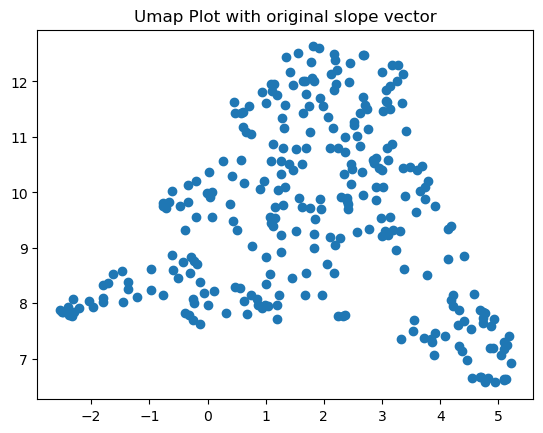

In [ ]:
reducer = umap.UMAP()
umap_original_res = reducer.fit_transform(slope_mean)
print(np.shape(umap_original_res))
plt.scatter(umap_original_res[:, 0],umap_original_res[:, 1])
plt.title('Umap Plot with original slope vector')
plt.savefig(f'umap_plot/p{plane_index}/umap_original_slope.png')

In [ ]:
umap_res = umap_normalize_res


5.57655


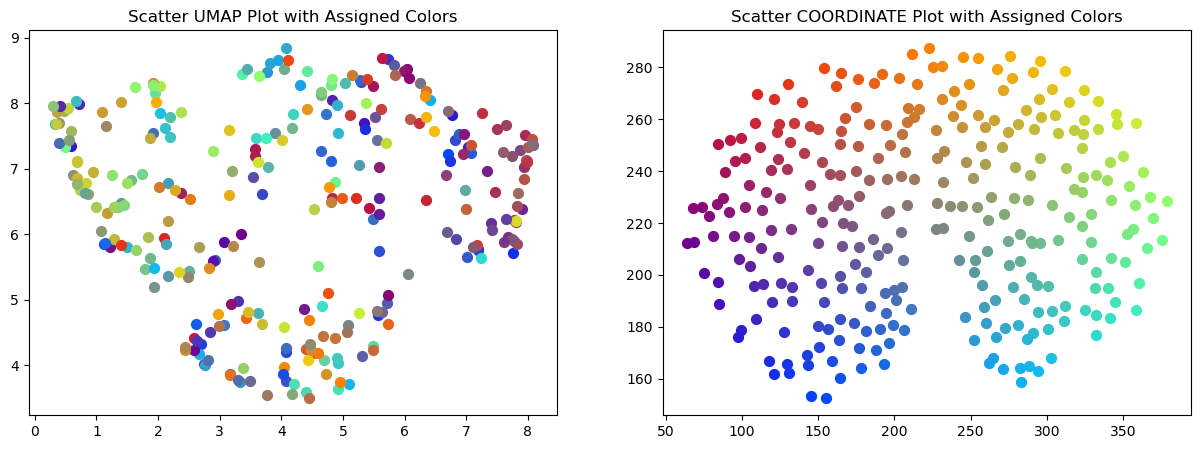

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
bottom_left_color = (0, 0, 1)  # Blue
bottom_right_color = (0, 1, 1)  # Cyan
top_left_color = (1, 0, 0)  # Red
top_right_color = (1, 1, 0)  # Yellow

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(15, 5))
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    y_ratio = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

    r = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[0] + x_ratio * bottom_right_color[0]) + \
        y_ratio * ((1 - x_ratio) * top_left_color[0] + x_ratio * top_right_color[0])

    g = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[1] + x_ratio * bottom_right_color[1]) + \
        y_ratio * ((1 - x_ratio) * top_left_color[1] + x_ratio * top_right_color[1])

    b = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[2] + x_ratio * bottom_right_color[2]) + \
        y_ratio * ((1 - x_ratio) * top_left_color[2] + x_ratio * top_right_color[2])

    color = (r, g, b)
    #print(color)
    ax[0].scatter(u_x[i], u_y[i], c=[color], s=50)
    ax[1].scatter(x[i], y[i], c=[color], s = 50)

# Set labels and title
ax[0].set_title('Scatter UMAP Plot with Assigned Colors')
ax[1].set_title('Scatter COORDINATE Plot with Assigned Colors')

# Show the plot
plt.savefig(f'umap_plot/p{plane_index}/umap_normalized_slope_four_color.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
left_color = (0, 0, 1)  # Blue
right_color = (1, 0, 0)  # Cyan

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(15, 5))
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    y_ratio = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

    r = (1 - x_ratio) * left_color[0] + x_ratio * right_color[0]
    g = (1 - x_ratio) * left_color[1] + x_ratio * right_color[1]
    b = (1 - x_ratio) * left_color[2] + x_ratio * right_color[2]

    new_r = r +(1-r)*y_ratio
    new_g = g +(1-g)*y_ratio
    new_b = b +(1-b)*y_ratio
    color = (new_r, new_g, new_b)
    #print(color)
    ax[0].scatter(u_x[i], u_y[i], c=[color], s=50)
    ax[1].scatter(x[i], y[i], c=[color], s = 50)

# Set labels and title
ax[0].set_title('Scatter UMAP Plot with Assigned Colors')
ax[1].set_title('Scatter COORDINATE Plot with Assigned Colors')
# Show the plot
plt.savefig(f'umap_plot/p{plane_index}/umap_normalized_slope_two_color_lr.png')
plt.show()

5.57655


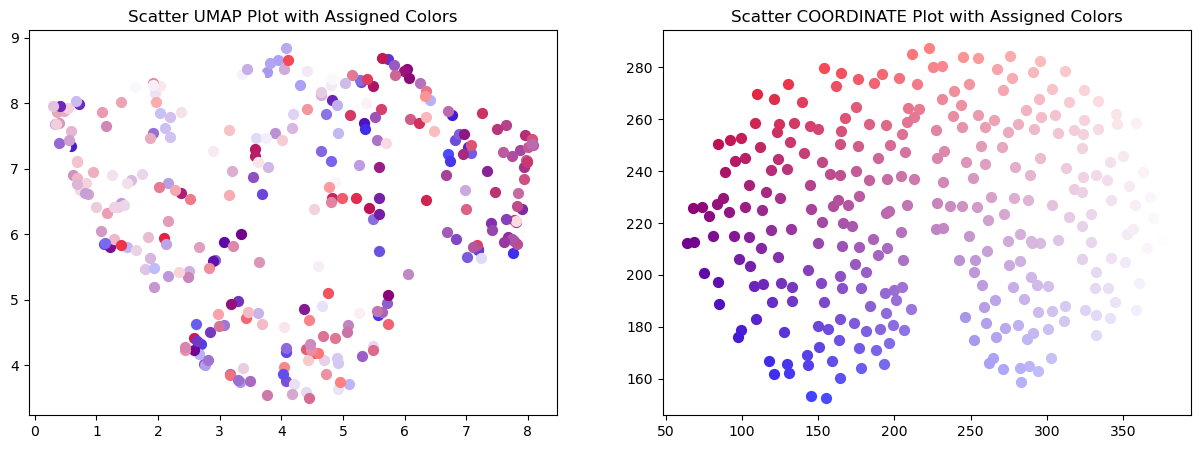

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
upper_color = (0, 0, 1)  # Blue
lower_color = (1, 0, 0)  # Cyan

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(15, 5))
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    y_ratio = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

    r = (1 - y_ratio) * upper_color[0] + y_ratio * lower_color[0]
    g = (1 - y_ratio) * upper_color[1] + y_ratio * lower_color[1]
    b = (1 - y_ratio) * upper_color[2] + y_ratio * lower_color[2]

    new_r = r +(1-r)*x_ratio
    new_g = g +(1-g)*x_ratio
    new_b = b +(1-b)*x_ratio
    color = (new_r, new_g, new_b)
    #print(color)
    ax[0].scatter(u_x[i], u_y[i], c=[color], s=50)
    ax[1].scatter(x[i], y[i], c=[color], s = 50)

# Set labels and title
ax[0].set_title('Scatter UMAP Plot with Assigned Colors')
ax[1].set_title('Scatter COORDINATE Plot with Assigned Colors')
# Show the plot
plt.savefig(f'umap_plot/p{plane_index}/umap_normalized_slope_two_color_ud.png')
plt.show()

In [ ]:
umap_res = umap_original_res

5.57655


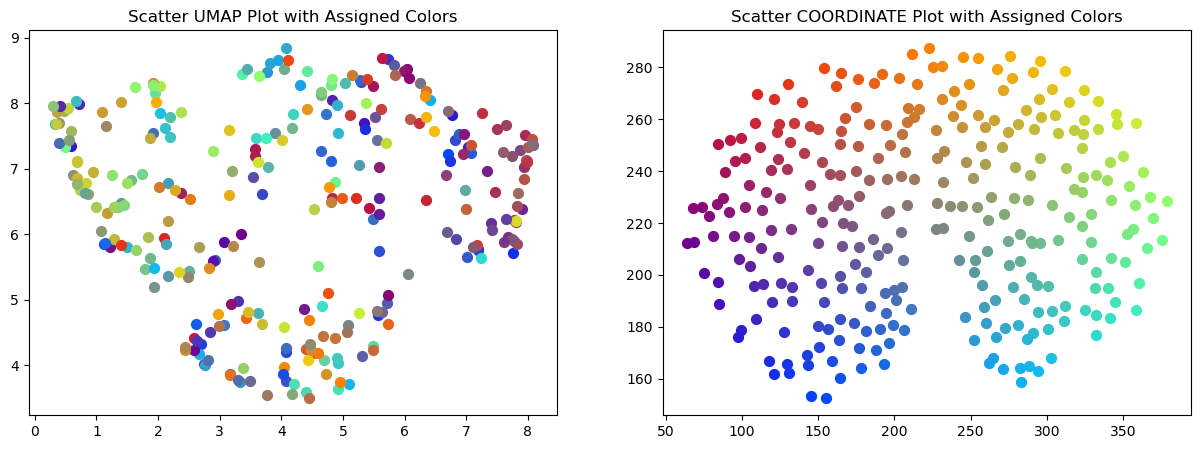

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
bottom_left_color = (0, 0, 1)  # Blue
bottom_right_color = (0, 1, 1)  # Cyan
top_left_color = (1, 0, 0)  # Red
top_right_color = (1, 1, 0)  # Yellow

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(15, 5))
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    y_ratio = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

    r = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[0] + x_ratio * bottom_right_color[0]) + \
        y_ratio * ((1 - x_ratio) * top_left_color[0] + x_ratio * top_right_color[0])

    g = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[1] + x_ratio * bottom_right_color[1]) + \
        y_ratio * ((1 - x_ratio) * top_left_color[1] + x_ratio * top_right_color[1])

    b = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[2] + x_ratio * bottom_right_color[2]) + \
        y_ratio * ((1 - x_ratio) * top_left_color[2] + x_ratio * top_right_color[2])

    color = (r, g, b)
    #print(color)
    ax[0].scatter(u_x[i], u_y[i], c=[color], s=50)
    ax[1].scatter(x[i], y[i], c=[color], s = 50)

# Set labels and title
ax[0].set_title('Scatter UMAP Plot with Assigned Colors')
ax[1].set_title('Scatter COORDINATE Plot with Assigned Colors')

# Show the plot
plt.savefig(f'umap_plot/p{plane_index}/umap_original_slope_four_color.png')
plt.show()


5.57655


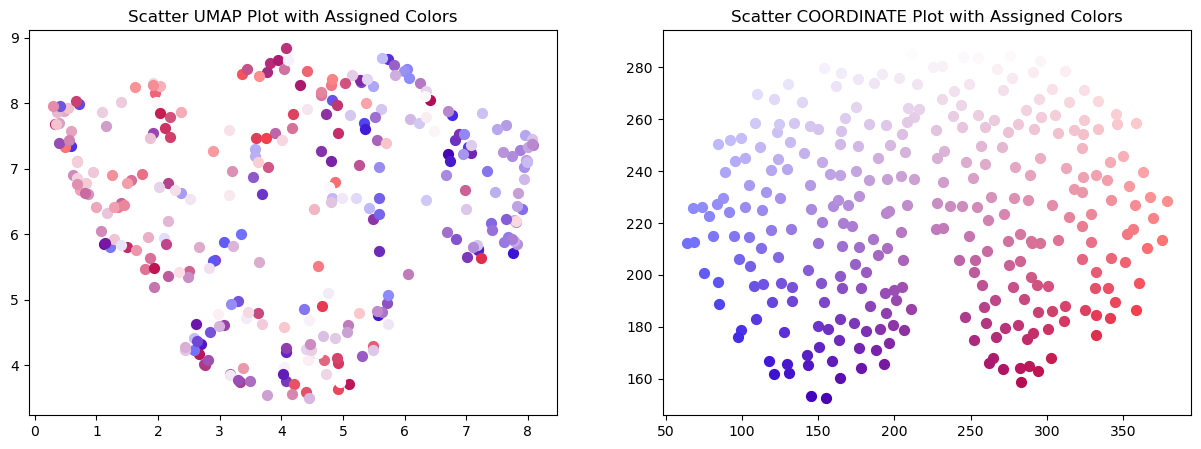

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
left_color = (0, 0, 1)  # Blue
right_color = (1, 0, 0)  # Red

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(15, 5))
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    y_ratio = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

    r = (1 - x_ratio) * left_color[0] + x_ratio * right_color[0]
    g = (1 - x_ratio) * left_color[1] + x_ratio * right_color[1]
    b = (1 - x_ratio) * left_color[2] + x_ratio * right_color[2]

    new_r = r +(1-r)*y_ratio
    new_g = g +(1-g)*y_ratio
    new_b = b +(1-b)*y_ratio
    color = (new_r, new_g, new_b)
    #print(color)
    ax[0].scatter(u_x[i], u_y[i], c=[color], s=50)
    ax[1].scatter(x[i], y[i], c=[color], s = 50)

# Set labels and title
ax[0].set_title('Scatter UMAP Plot with Assigned Colors')
ax[1].set_title('Scatter COORDINATE Plot with Assigned Colors')
# Show the plot
plt.savefig(f'umap_plot/p{plane_index}/umap_original_slope_two_color_lr.png')
plt.show()

5.57655


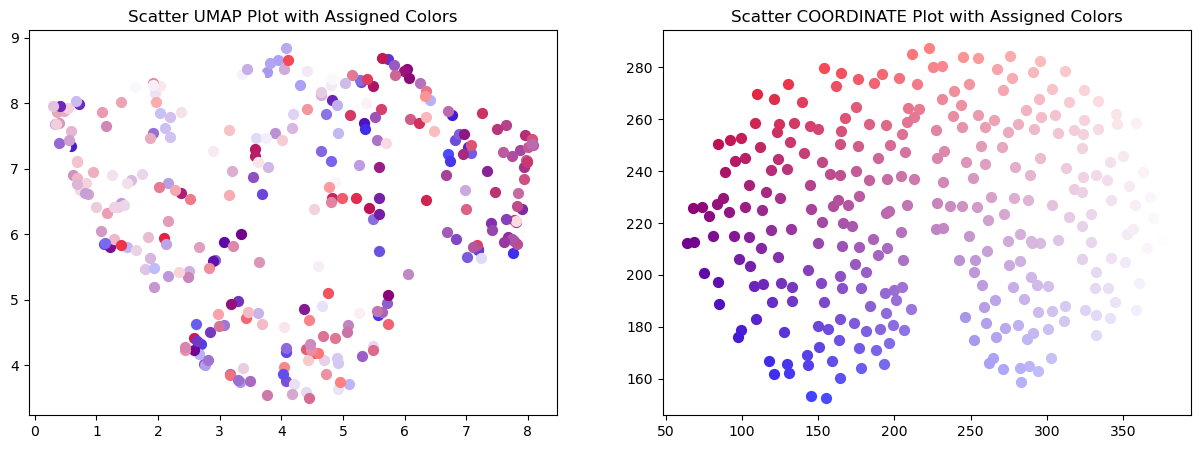

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
upper_color = (0, 0, 1)  # Blue
lower_color = (1, 0, 0)  # Red

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(15, 5))
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    y_ratio = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

    r = (1 - y_ratio) * left_color[0] + y_ratio * right_color[0]
    g = (1 - y_ratio) * left_color[1] + y_ratio * right_color[1]
    b = (1 - y_ratio) * left_color[2] + y_ratio * right_color[2]

    new_r = r +(1-r)*x_ratio
    new_g = g +(1-g)*x_ratio
    new_b = b +(1-b)*x_ratio
    color = (new_r, new_g, new_b)
    #print(color)
    ax[0].scatter(u_x[i], u_y[i], c=[color], s=50)
    ax[1].scatter(x[i], y[i], c=[color], s = 50)

# Set labels and title
ax[0].set_title('Scatter UMAP Plot with Assigned Colors')
ax[1].set_title('Scatter COORDINATE Plot with Assigned Colors')
# Show the plot
plt.savefig(f'umap_plot/p{plane_index}/umap_original_slope_two_color_ud.png')
plt.show()

In [ ]:
fit_line_barcode.shape

(292, 8)

In [ ]:
responsive_record = []
for i in range(8):
    responsive_i = np.where(fit_line_barcode[:,i] == 1)
    print(responsive_i)
    responsive_record.append(responsive_i)

(array([  3,  11,  18,  20,  21,  23,  50,  51,  57,  60,  63,  67,  71,
        72,  94, 105, 108, 116, 119, 124, 125, 126, 131, 136, 144, 150,
       158, 161, 172, 173, 175, 181, 202, 225, 231, 232, 234, 236, 239,
       240, 248, 252, 253, 260, 263, 266, 267, 273, 276, 279, 283, 284,
       285, 286, 288, 290]),)
(array([ 20,  33,  39,  47,  57,  87, 100, 109, 113, 114, 116, 128, 148,
       153, 154, 168, 172, 204, 223, 225, 232, 248, 253, 258, 260, 266,
       267, 271, 290, 291]),)
(array([  2,   6,   9,  13,  14,  20,  25,  32,  33,  50,  51,  57,  63,
        69,  73,  75,  80,  90,  94,  95, 103, 105, 108, 114, 120, 121,
       126, 132, 141, 145, 149, 155, 158, 160, 161, 162, 163, 164, 165,
       166, 170, 172, 173, 207, 210, 212, 227, 229, 230, 231, 232, 233,
       237, 238, 242, 246, 247, 248, 253, 254, 258, 259, 260, 262, 269,
       273, 274, 275, 278, 288]),)
(array([  4,  28,  30,  35,  44,  50,  56,  57,  60,  63,  65,  67,  94,
        97, 105, 106, 108, 110, 114, 

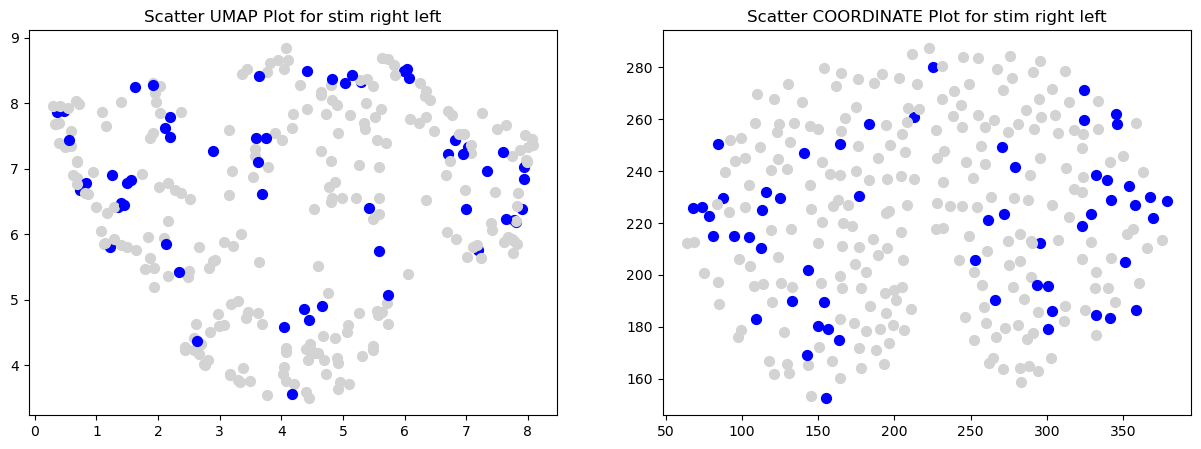

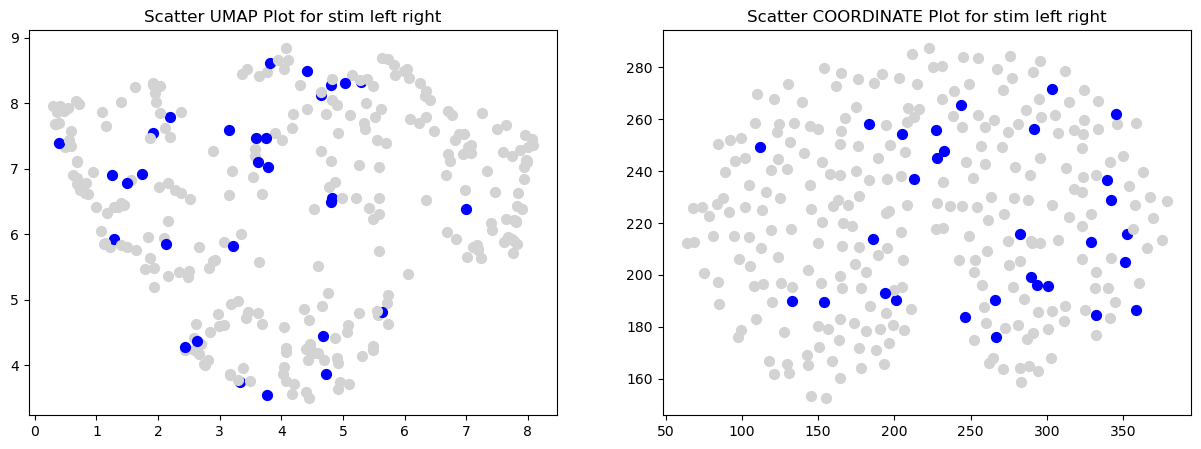

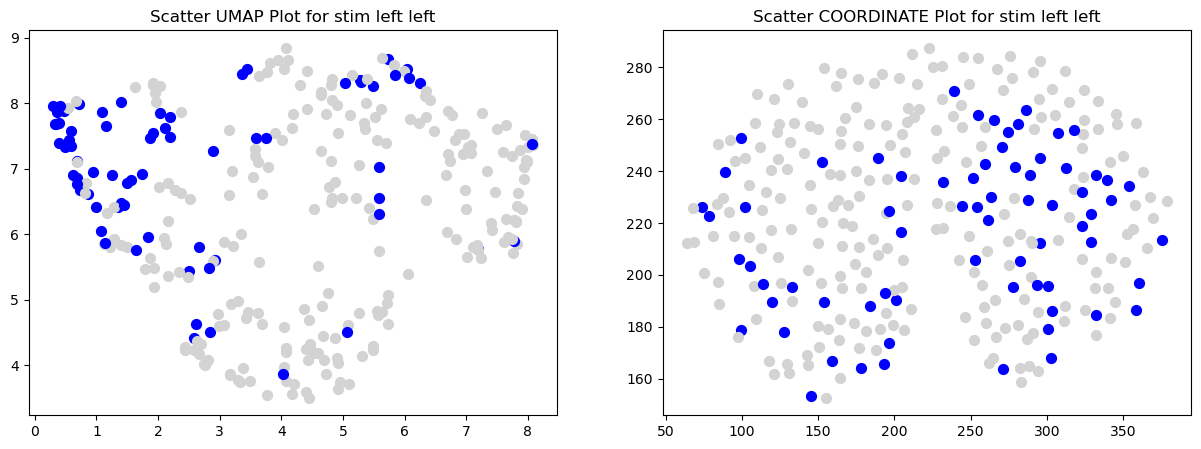

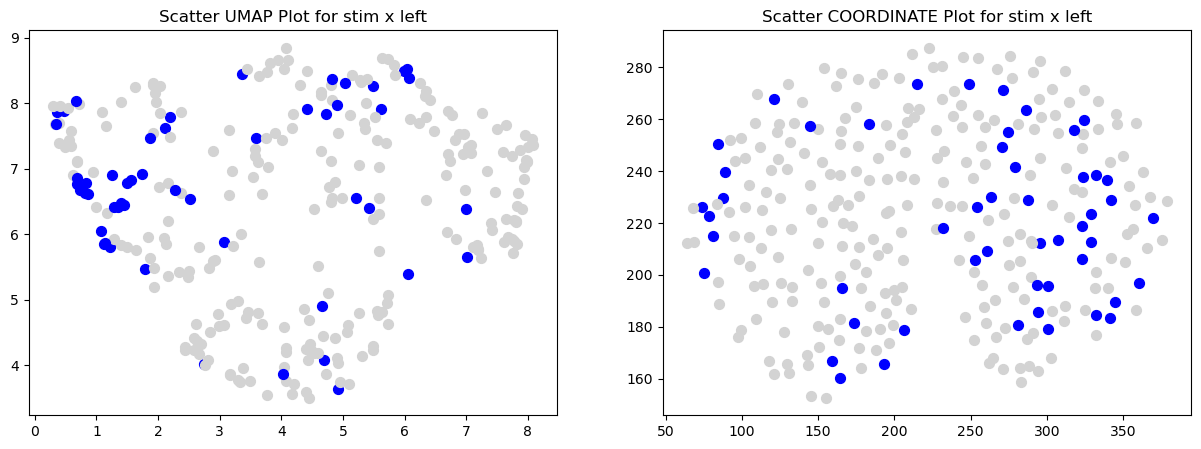

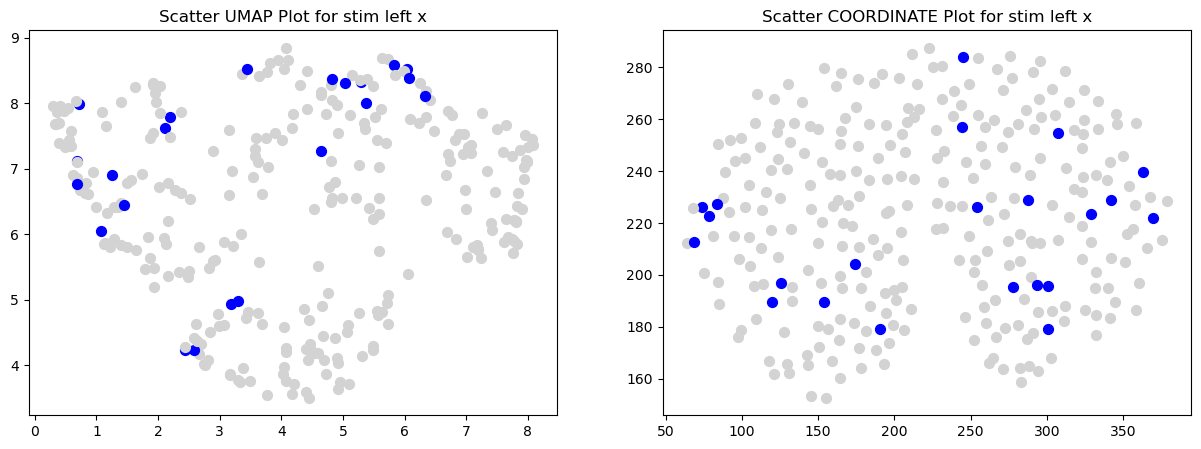

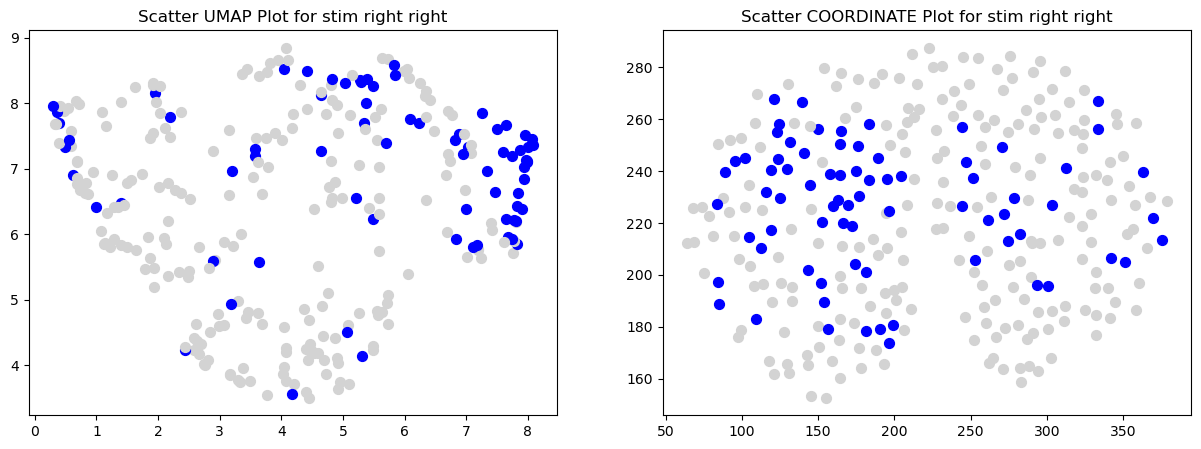

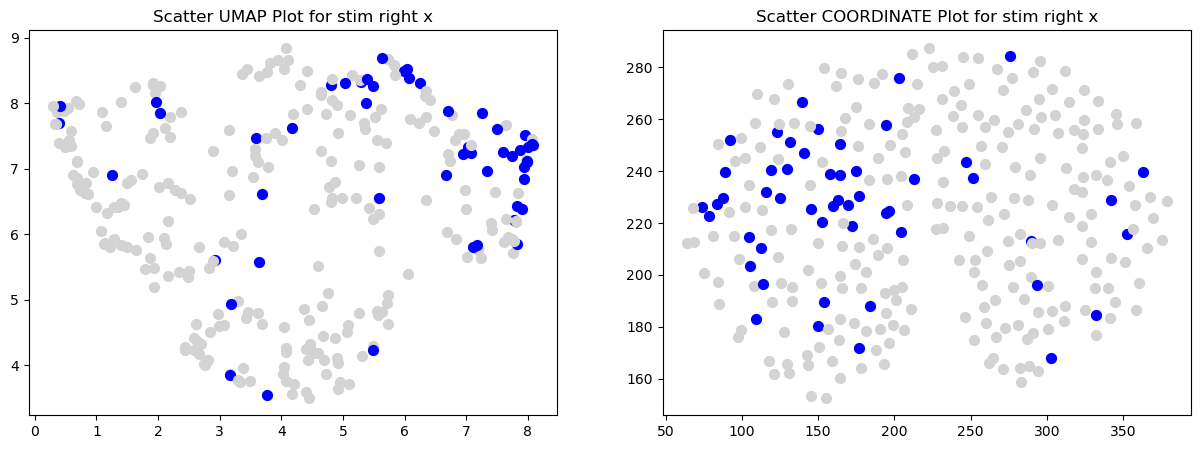

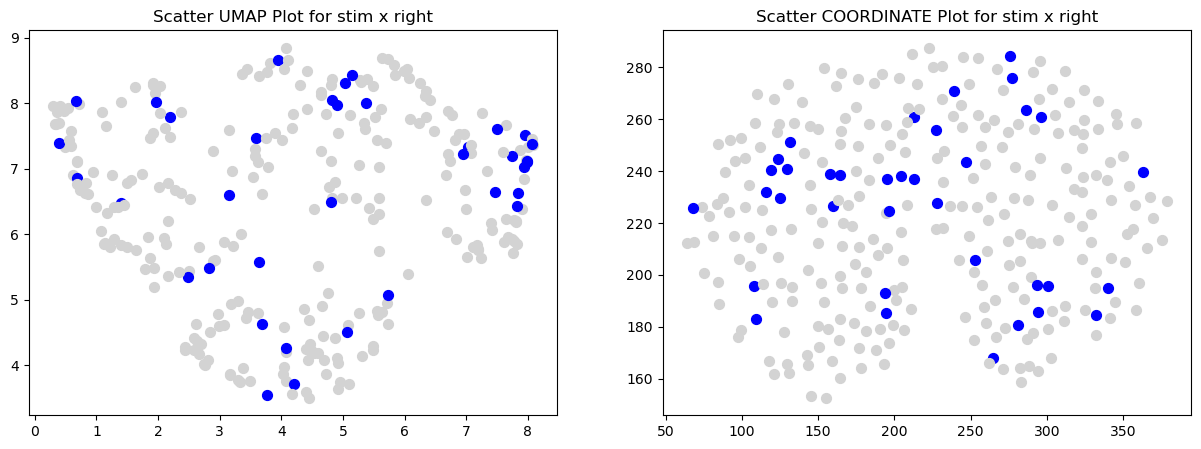

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
left_color = (0, 0, 1)  # Blue
right_color = (1, 0, 0)  # Red
stim_list = ["right left", "left right", "left left", "x left", "left x", "right right", "right x", "x right"]
# Create a figure and axis
for stim in range(8):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    responsive_index = responsive_record[stim][-1]
    count = 0
    # Plot each point with its assigned color
    for i in range(len(u_x)):
        #print(color)
        if (count < np.shape(responsive_index)[0]) and (i == responsive_index[count]):
            ax[0].scatter(u_x[i], u_y[i], color='blue', s=50)
            ax[1].scatter(x[i], y[i], c='blue', s = 50)
            count += 1
        else:
            ax[0].scatter(u_x[i], u_y[i], color='lightgrey', s=50)
            ax[1].scatter(x[i], y[i], color='lightgrey', s = 50)

    # Set labels and title
    ax[0].set_title(f'Scatter UMAP Plot for stim {stim_list[stim]}')
    ax[1].set_title(f'Scatter COORDINATE Plot for stim {stim_list[stim]}')
    # Show the plot
    plt.savefig(f'umap_plot/p{plane_index}/umap_fit_line_{stim_list[stim]}.png')
    plt.show()

### Find the nruon that response based on avg baseline

In [ ]:
responsive_avg_record = []
for i in range(8):
    responsive_i = np.where(fit_avg_barcode[:,i] == 1)
    print(responsive_i)
    responsive_avg_record.append(responsive_i)

(array([ 11,  18,  20,  51,  57,  63,  71,  94, 125, 135, 172, 173, 232,
       236, 248, 253, 273, 283, 284, 285]),)
(array([ 47, 100, 101, 179, 232, 251, 287]),)
(array([  9,  13,  20,  33,  47,  51,  57,  63,  84,  94,  95, 105, 108,
       121, 155, 158, 160, 161, 165, 166, 172, 173, 212, 229, 230, 231,
       232, 237, 239, 242, 246, 247, 253, 259, 260, 262, 269, 273, 275,
       278, 288]),)
(array([  4,  57,  94, 105, 158, 160, 165, 169, 172, 173, 229, 231, 232,
       234, 237, 238, 248, 254, 260, 262, 269, 273]),)
(array([ 20,  63, 119, 232, 260]),)
(array([ 11,  20,  70,  71,  72,  77,  79,  85, 121, 127, 130, 135, 136,
       137, 140, 142, 144, 146, 227, 232, 236, 249, 251, 282, 283, 284,
       285]),)
(array([ 11,  20,  63,  71,  77,  85,  93, 102, 127, 130, 135, 136, 140,
       142, 232, 236, 249, 251, 282, 283, 284, 285]),)
(array([ 49, 127, 198, 227, 236, 249, 251]),)


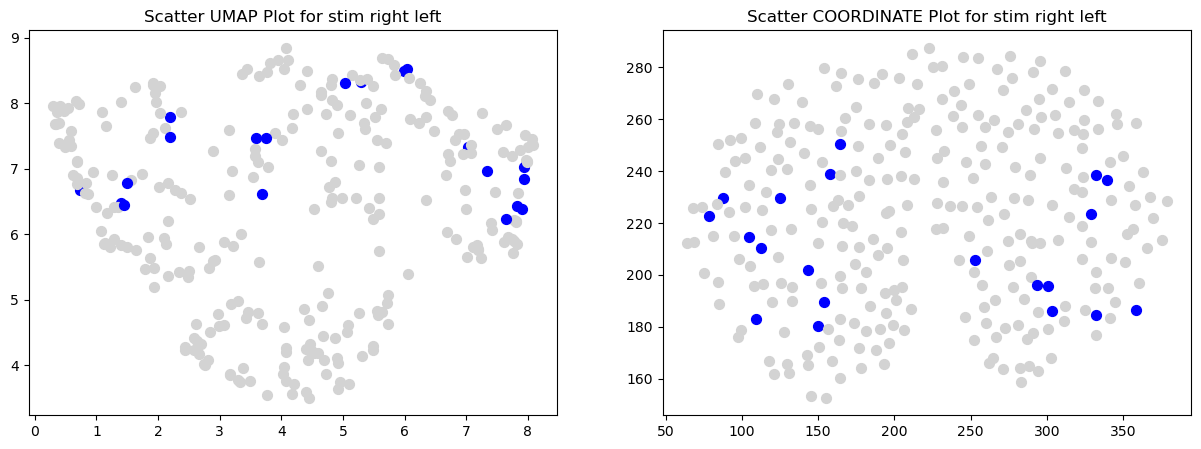

KeyboardInterrupt: 

In [ ]:
# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
left_color = (0, 0, 1)  # Blue
right_color = (1, 0, 0)  # Red
stim_list = ["right left", "left right", "left left", "x left", "left x", "right right", "right x", "x right"]
# Create a figure and axis
for stim in range(8):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    responsive_index = responsive_avg_record[stim][-1]
    count = 0
    # Plot each point with its assigned color
    for i in range(len(u_x)):
        #print(color)
        if (count < np.shape(responsive_index)[0]) and (i == responsive_index[count]):
            ax[0].scatter(u_x[i], u_y[i], color='blue', s=50)
            ax[1].scatter(x[i], y[i], c='blue', s = 50)
            count += 1
        else:
            ax[0].scatter(u_x[i], u_y[i], color='lightgrey', s=50)
            ax[1].scatter(x[i], y[i], color='lightgrey', s = 50)

    # Set labels and title
    ax[0].set_title(f'Scatter UMAP Plot for stim {stim_list[stim]}')
    ax[1].set_title(f'Scatter COORDINATE Plot for stim {stim_list[stim]}')
    # Show the plot
    plt.savefig(f'umap_plot/p{plane_index}/umap_fit_avg_{stim_list[stim]}.png')
    plt.show()

In [ ]:
responsive_trial_avg_record = []
for i in range(8):
    responsive_i = np.where(np.array([((trial_avg_p[j,i] <= 0.05) and (trial_avg_p[j,i] >= 0)) for j in range(np.shape(trial_avg_p)[0])]) == True)
    print(responsive_i)
    responsive_trial_avg_record.append(responsive_i)

In [ ]:
# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
left_color = (0, 0, 1)  # Blue
right_color = (1, 0, 0)  # Red
stim_list = ["right left", "left right", "left left", "x left", "left x", "right right", "right x", "x right"]
# Create a figure and axis
for stim in range(8):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    responsive_index = responsive_trial_avg_record[stim][-1]
    count = 0
    # Plot each point with its assigned color
    for i in range(len(u_x)):
        #print(color)
        if (count < np.shape(responsive_index)[0]) and (i == responsive_index[count]):
            ax[0].scatter(u_x[i], u_y[i], color='blue', s=50)
            ax[1].scatter(x[i], y[i], c='blue', s = 50)
            count += 1
        else:
            ax[0].scatter(u_x[i], u_y[i], color='lightgrey', s=50)
            ax[1].scatter(x[i], y[i], color='lightgrey', s = 50)

    # Set labels and title
    ax[0].set_title(f'Scatter UMAP Plot for stim {stim_list[stim]}')
    ax[1].set_title(f'Scatter COORDINATE Plot for stim {stim_list[stim]}')
    # Show the plot
    plt.savefig(f'umap_plot/p{plane_index}/umap_trial_avg_{stim_list[stim]}.png')
    plt.show()

In [31]:
correlate_p.shape

(292, 8)

In [32]:
responsive_slope_record = []
for i in range(8):
    responsive_i = np.where(np.array([((correlate_p[j,i] <= 0.05) and (correlate_p[j,i] >= 0)) for j in range(np.shape(correlate_p)[0])]) == True)
    print(responsive_i)
    responsive_slope_record.append(responsive_i)

(array([ 11,  20,  24,  50,  63,  70,  71,  93,  94, 102, 106, 114, 123,
       125, 126, 135, 141, 159, 172, 232, 236, 253, 273, 284]),)
(array([  1,  10,  20,  42,  47,  68,  73, 101, 103, 111, 116, 119, 151,
       155, 179, 189, 209, 218, 232, 242, 243, 248]),)
(array([  9,  13,  20,  33,  38,  42,  47,  57,  63,  95, 105, 106, 113,
       120, 121, 122, 123, 125, 143, 145, 158, 160, 161, 164, 165, 172,
       173, 184, 207, 229, 230, 232, 234, 237, 242, 246, 247, 253, 254,
       255, 260, 262, 268, 269, 273, 275, 278]),)
(array([ 32,  57,  73,  94,  95, 100, 101, 102, 105, 106, 108, 158, 161,
       166, 169, 172, 173, 195, 212, 219, 229, 230, 231, 234, 237, 239,
       254, 260, 273]),)
(array([ 20,  26,  27,  32,  33,  63,  80, 101, 160, 165, 172, 221, 232,
       243, 260, 278]),)
(array([ 11,  12,  20,  21,  26,  32,  44,  57,  63,  64,  70,  71,  72,
        73,  77,  79,  81,  85, 121, 127, 128, 130, 135, 136, 137, 140,
       142, 143, 144, 159, 161, 179, 187, 198, 227, 23

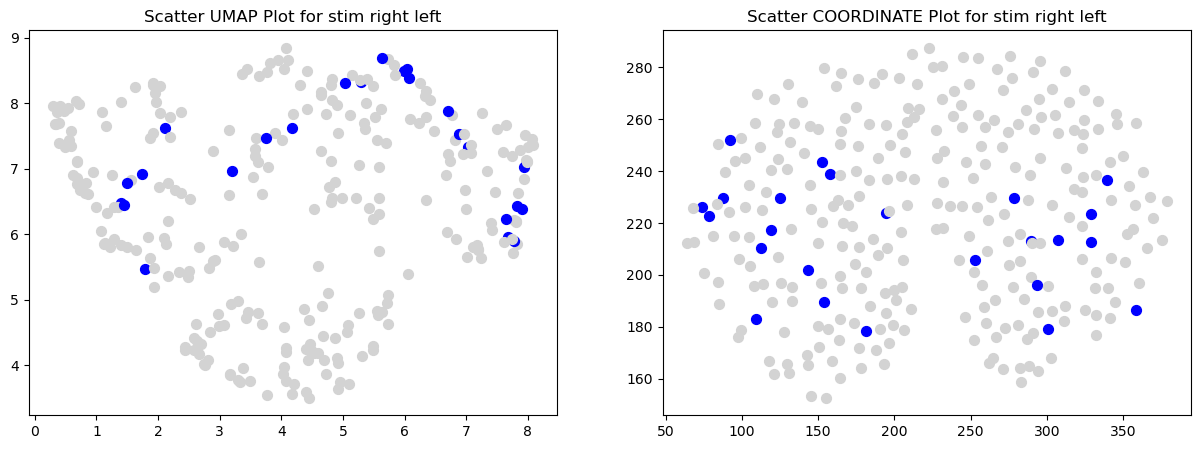

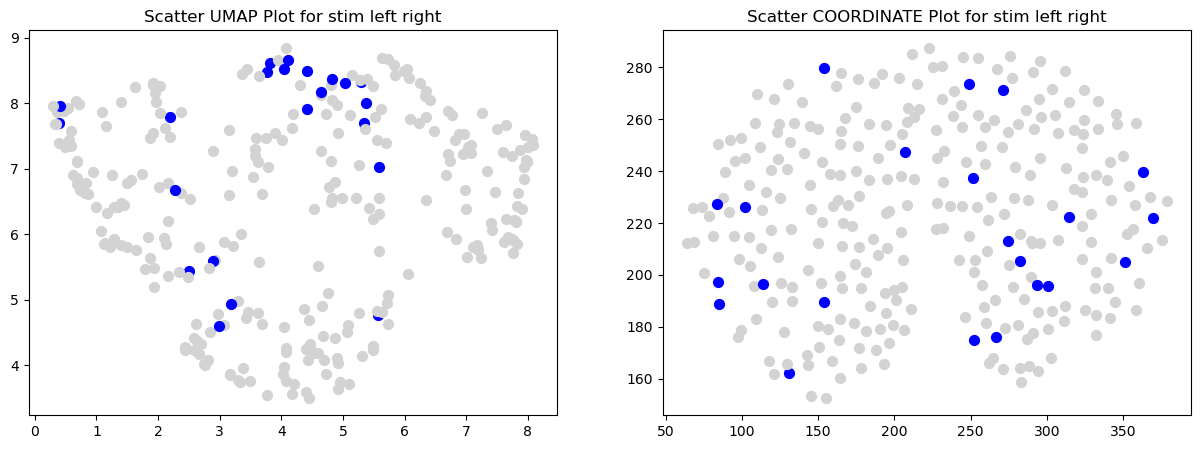

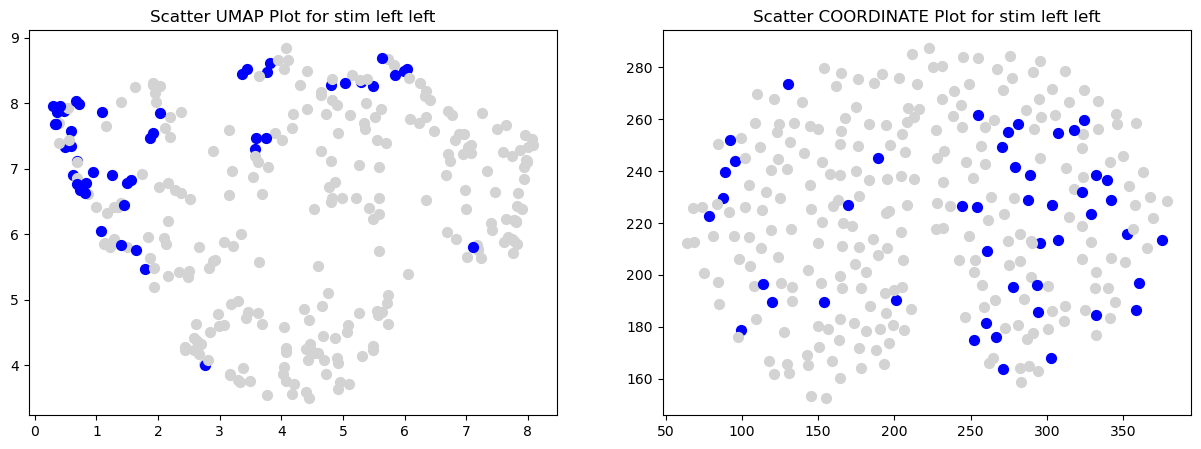

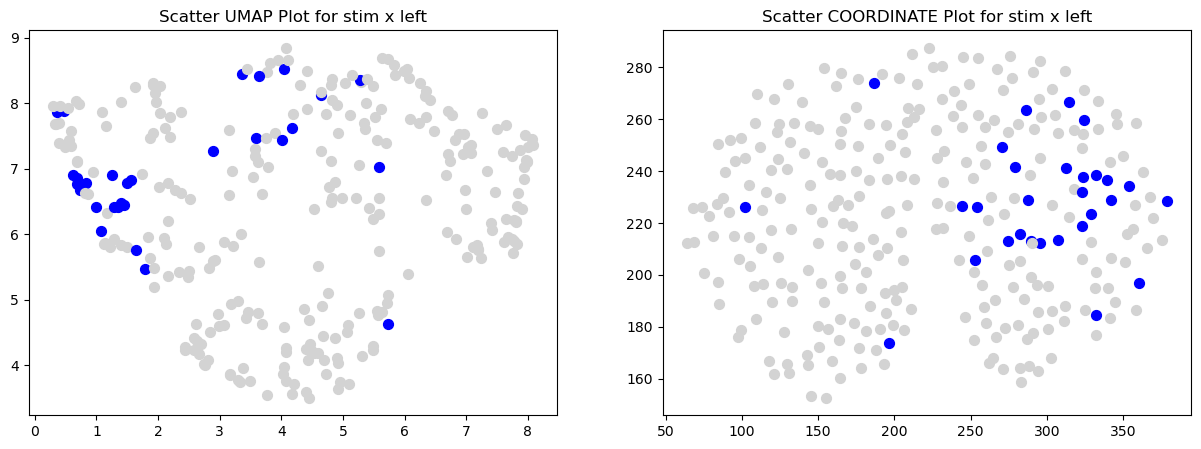

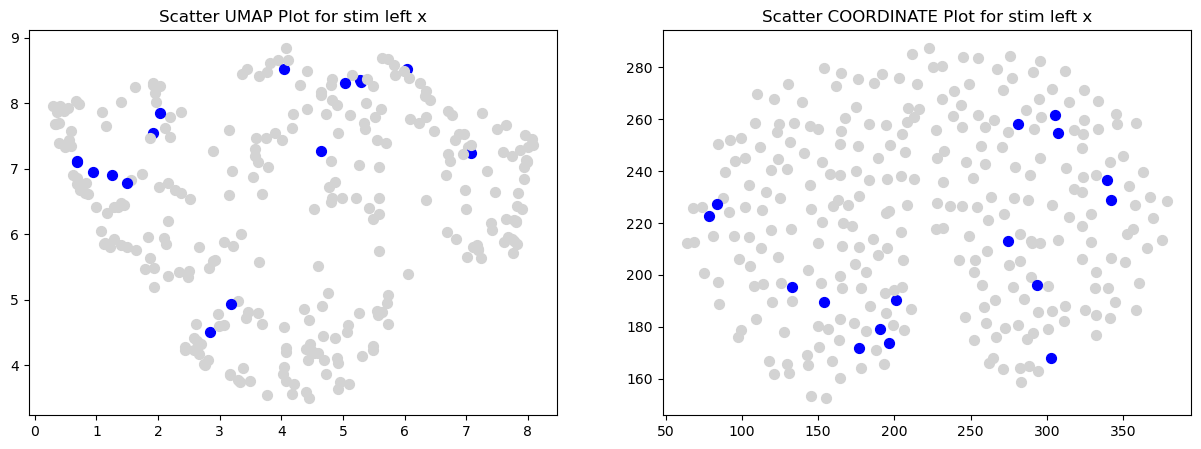

KeyboardInterrupt: 

In [33]:
# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
left_color = (0, 0, 1)  # Blue
right_color = (1, 0, 0)  # Red
stim_list = ["right left", "left right", "left left", "x left", "left x", "right right", "right x", "x right"]
# Create a figure and axis
for stim in range(8):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    responsive_index = responsive_slope_record[stim][-1]
    count = 0
    # Plot each point with its assigned color
    for i in range(len(u_x)):
        #print(color)
        if (count < np.shape(responsive_index)[0]) and (i == responsive_index[count]):
            ax[0].scatter(u_x[i], u_y[i], color='blue', s=50)
            ax[1].scatter(x[i], y[i], c='blue', s = 50)
            count += 1
        else:
            ax[0].scatter(u_x[i], u_y[i], color='lightgrey', s=50)
            ax[1].scatter(x[i], y[i], color='lightgrey', s = 50)

    # Set labels and title
    ax[0].set_title(f'Scatter UMAP Plot for stim {stim_list[stim]}')
    ax[1].set_title(f'Scatter COORDINATE Plot for stim {stim_list[stim]}')
    # Show the plot
    plt.savefig(f'umap_plot/p{plane_index}/umap_slope_{stim_list[stim]}.png')
    plt.show()